In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
data = boston.data
type(data)
data.shape

(506, 13)

In [8]:
data = pd.DataFrame(data = data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Understand your data

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Data Visualization

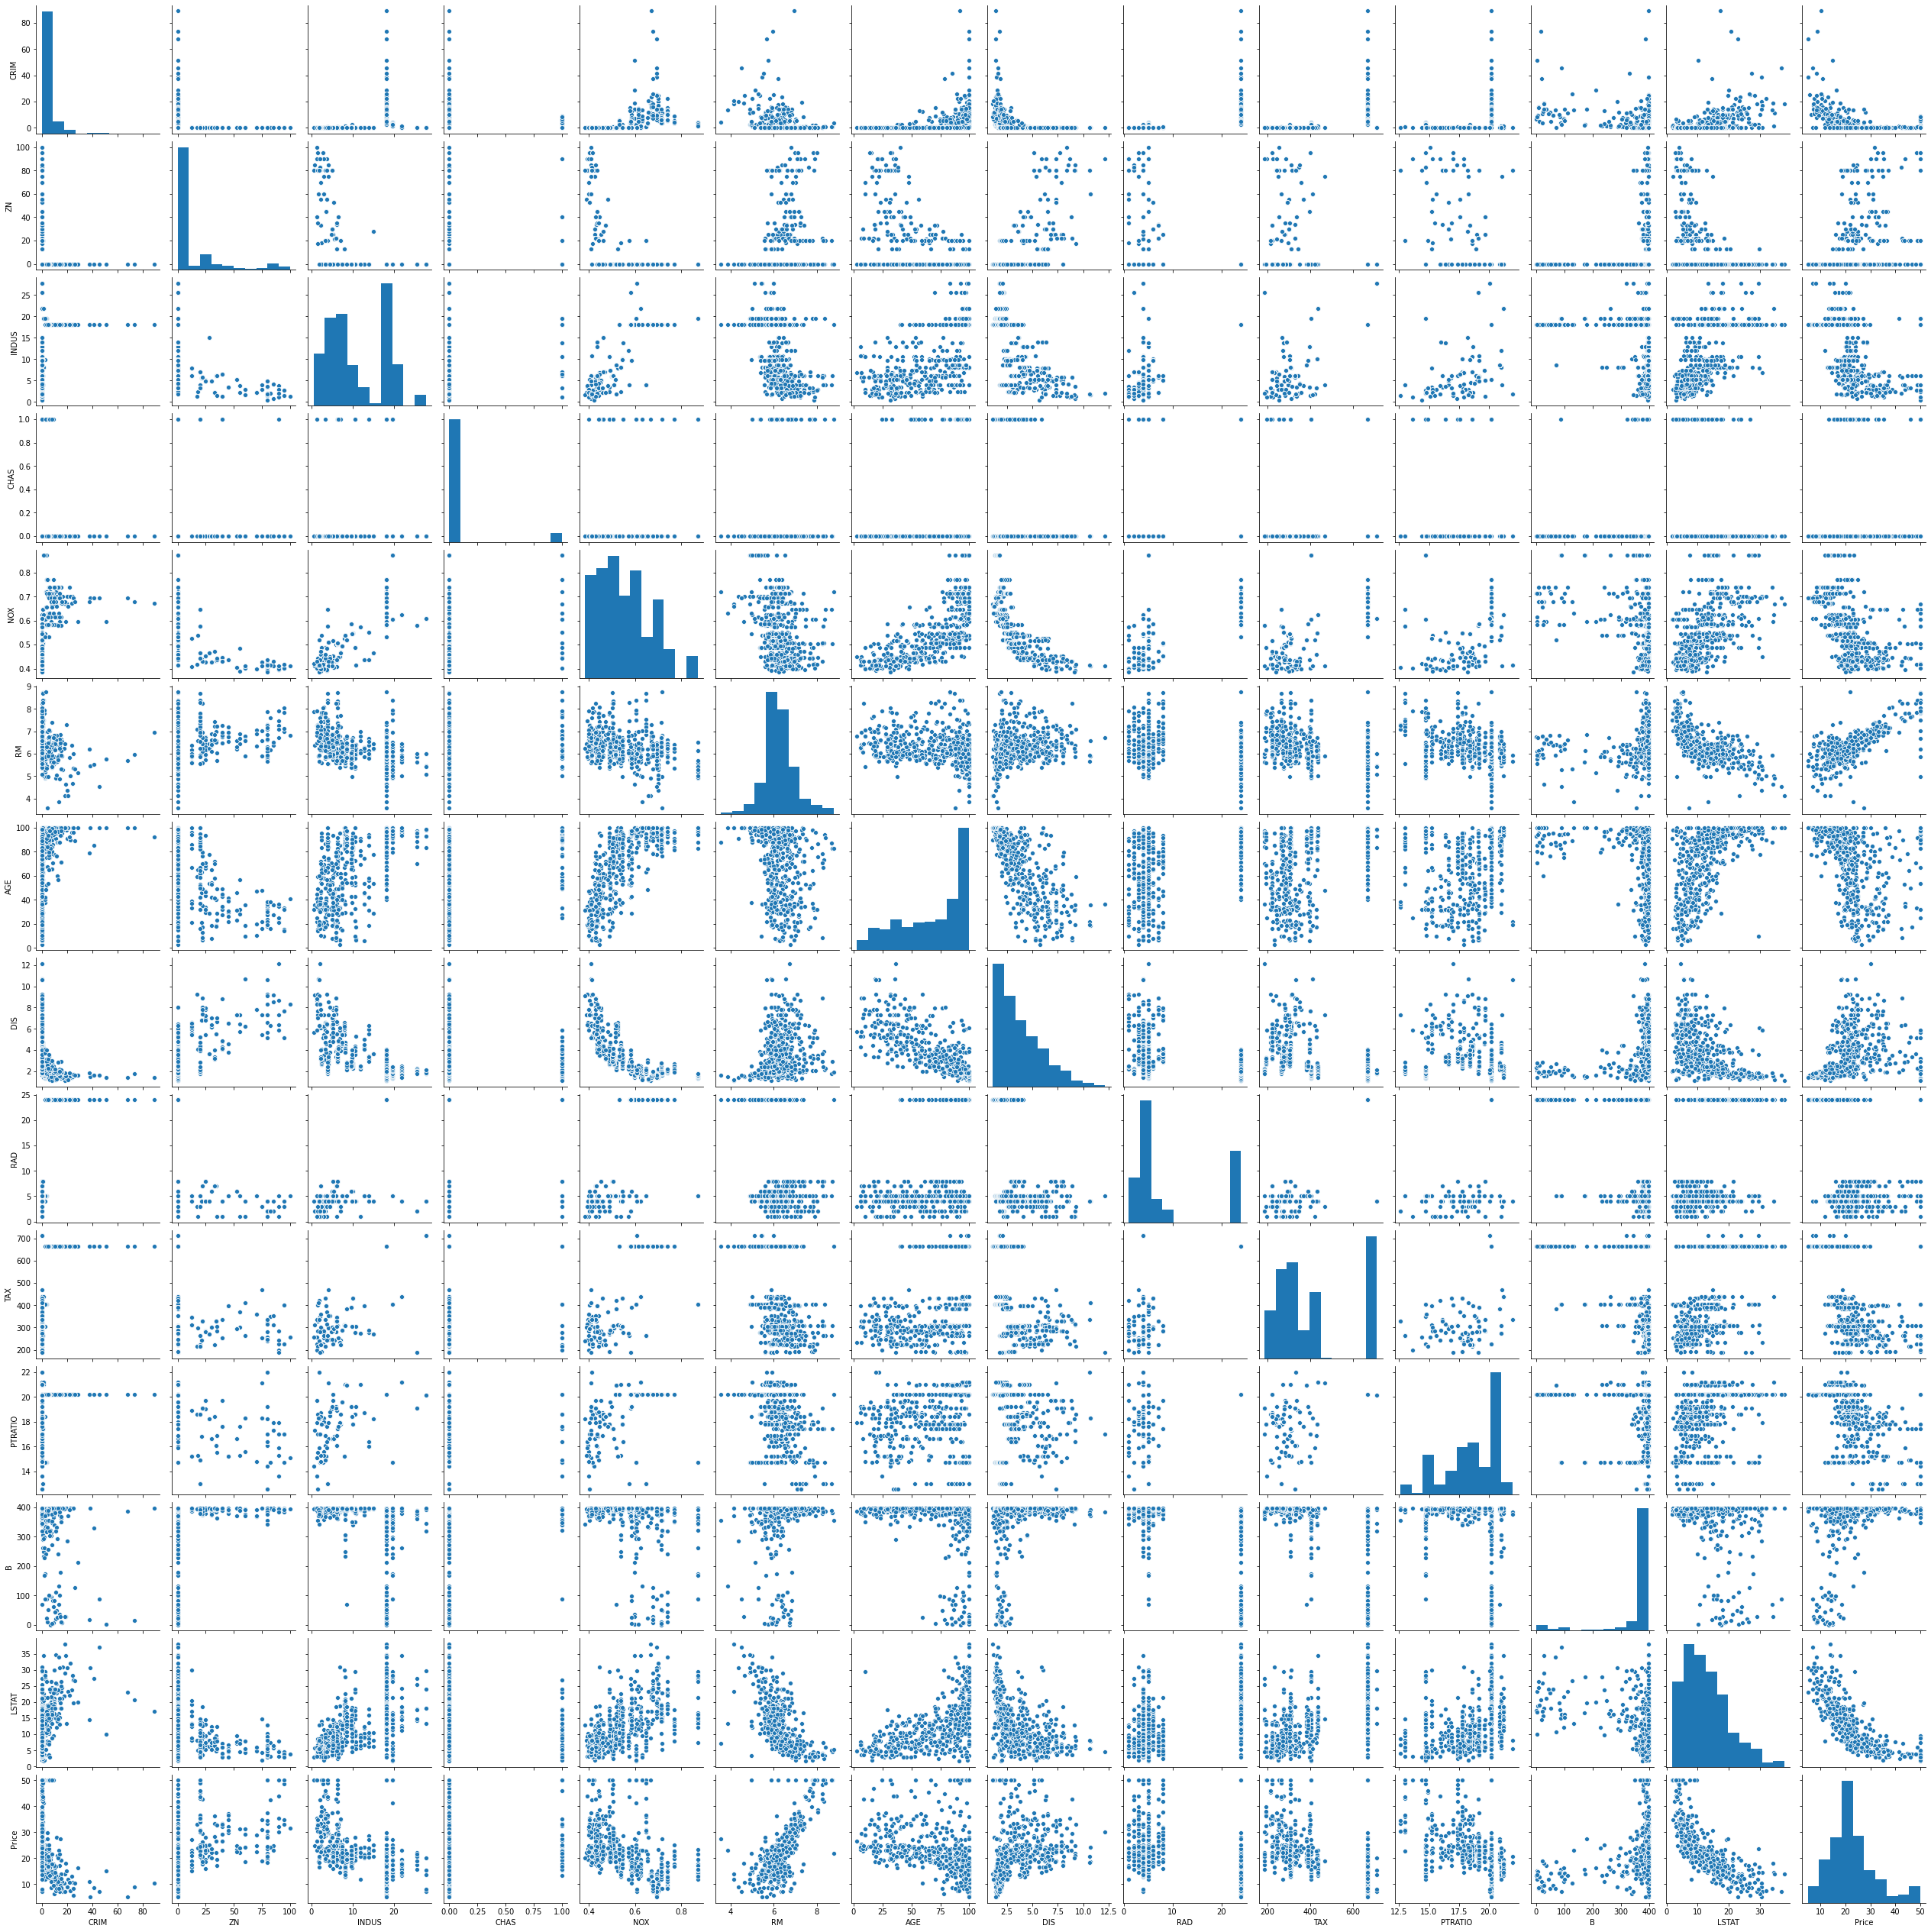

In [13]:
sns.pairplot(data)

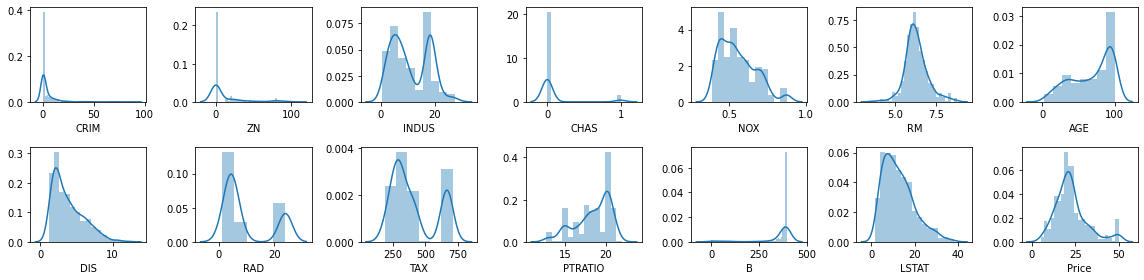

In [14]:
rows = 2
cols = 7
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,4))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

In [15]:
cormat = data.corr()
cormat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


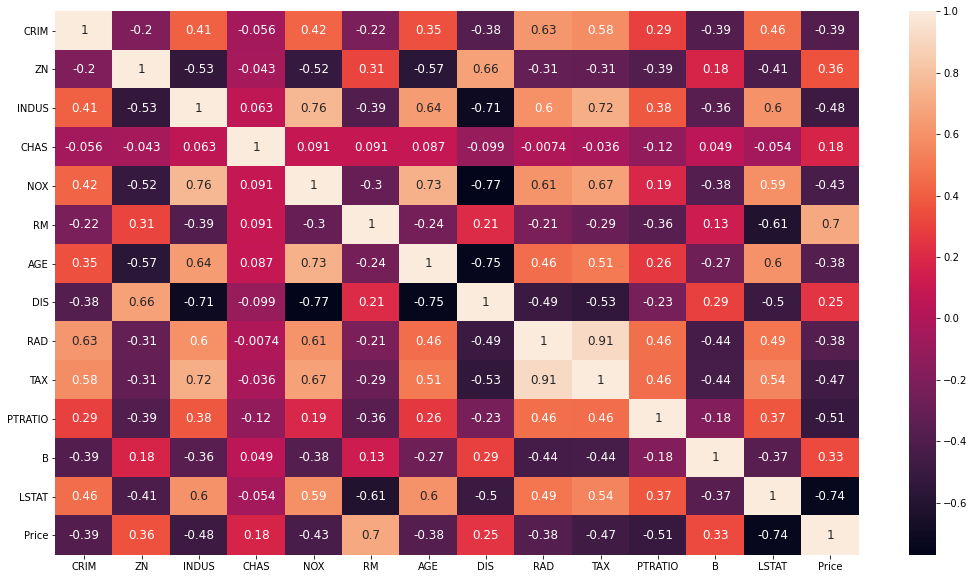

In [16]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cormat, annot = True, annot_kws={'size':12})

In [17]:
def getCorrelatedFeature(corrdata, threshold):
    feature, value = [], []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df

In [18]:
threshold = 0.50
corr_value = getCorrelatedFeature(cormat['Price'], threshold)
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [19]:
correlated_data = data[corr_value.index]  #dataset with updated columns
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


## Pairplot and Cormat of correlated Data

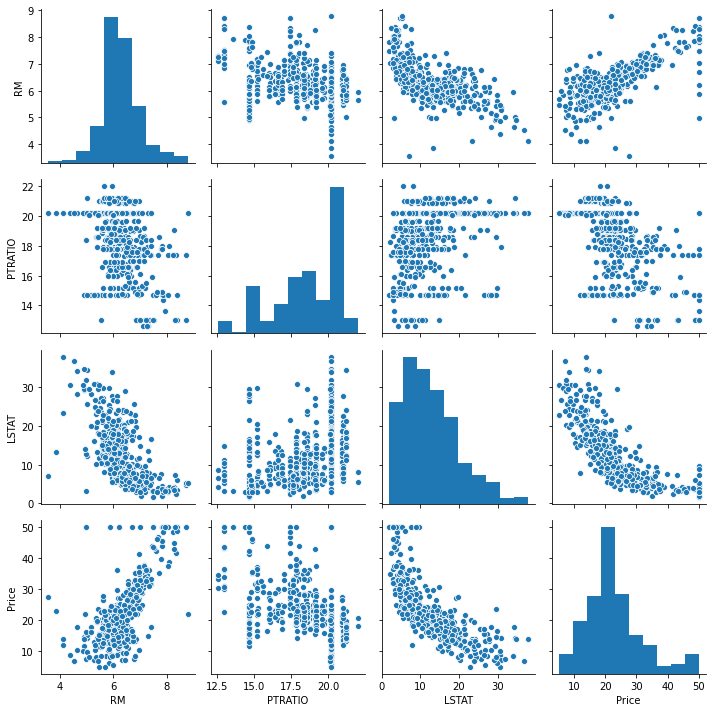

In [20]:
sns.pairplot(correlated_data)
plt.tight_layout()

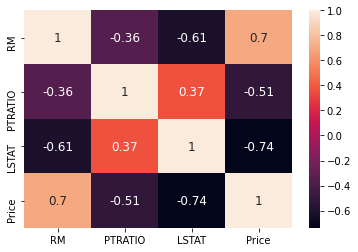

In [21]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws = {'size':12})

## Shuffle and Split Data

In [22]:
X = correlated_data.drop(labels = ['Price'], axis = 1)
y = correlated_data['Price']
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
X_train.shape, X_test.shape

((404, 3), (102, 3))

## Lets train the mode

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_predict = model.predict(X_test)

In [27]:
df = pd.DataFrame(data = [y_predict, y_test])
df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


In [28]:
from sklearn.metrics import r2_score

In [29]:
correlated_data.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [30]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2 score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2 score:  0.48816420156925067
mae:  4.404434993909257
mse:  41.67799012221683


## Store Feature Performance

In [31]:
total_features, total_features_name = [],[]
selected_correlation_value, r2, mae_value, mse_value = [], [], [], []

In [32]:
def performance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_df = pd.DataFrame(data = [total_features_name, total_features, selected_correlation_value, r2, mae_value, mse_value], 
                              index = ['Feature Names', '# Features', 'corr_value', 'r2_score', 'MAE', 'MSE'])
    return metrics_df.T

In [33]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Feature Names,# Features,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678


## regression plot of the features correlated with the House Price

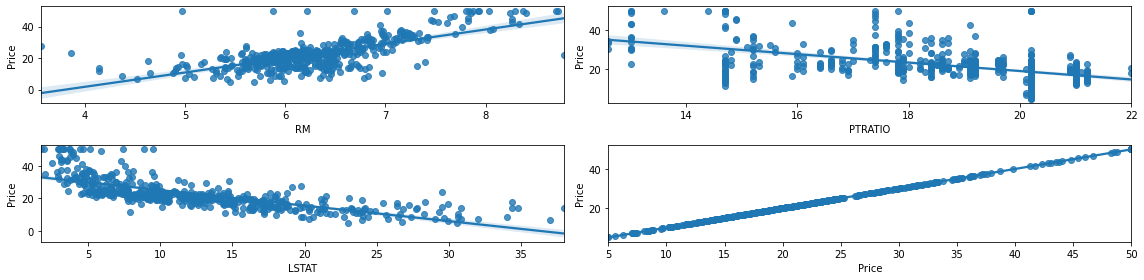

In [34]:
rows, cols = 2, 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16, 4))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index += 1
fig.tight_layout()

## Let find out other combination of columns to get better accuracy with >60%

In [35]:
cormat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [36]:
threshold = 0.60
corr_value = getCorrelatedFeature(cormat['Price'], threshold)
corr_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [38]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [39]:
def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['Price'], axis = 1)
    y = corr_data['Price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return y_predict

In [40]:
y_predict = get_y_predict(correlated_data)

In [41]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Feature Names,# Features,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831


## Let find out other combination of columns to get better accuracy with >70%

In [43]:
threshold = 0.70
corr_value = getCorrelatedFeature(cormat['Price'], threshold)
corr_value

,Corr Value
LSTAT,-0.737663
Price,1.000000


In [44]:
correlated_data = data[corr_value.index]
correlated_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [45]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Feature Names,# Features,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363


## Let select only RM

In [47]:
correlated_data = data[['RM', 'Price']]
correlated_data.head()

,RM,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [48]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Feature Names,# Features,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363
3,['RM' 'Price'],1,0.7,0.423944,4.32474,46.9074


## Let find out other combination of columns to get better accuracy with >40%

In [50]:
threshold = 0.40
corr_value = getCorrelatedFeature(cormat['Price'], threshold)
corr_value

,Corr Value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [53]:
correlated_data = data[corr_value.index]
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [54]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Feature Names,# Features,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363
3,['RM' 'Price'],1,0.7,0.423944,4.32474,46.9074
4,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'P...,6,0.4,0.476203,4.3945,42.6519


## Understand Normalization and Standardization

### The data is standardized when mean is 0 and variance is 1 for the data. Normalization is the process of scaling individual samples the have unit norm.

In [55]:
model = LinearRegression(normalize = True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [56]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.4881642015692508

## Learning Curve

In [58]:
from sklearn.model_selection import learning_curve, ShuffleSplit

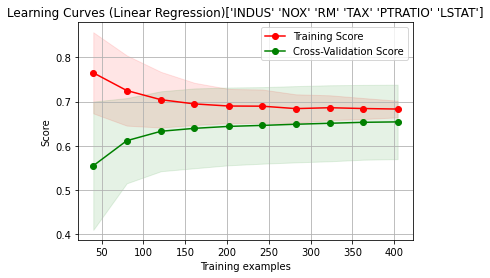

In [63]:
def plot_learning_curve(estimator, title, X, Y, ylim=None, cv=None,
                       n_jobs=None, train_sizes=np.linspace(0.1,1.0,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X,
                y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                    train_scores_mean + train_scores_std, alpha = 0.1, 
                    color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                    test_scores_mean + test_scores_std, alpha = 0.1, 
                    color = 'g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
            label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
            label = 'Cross-Validation Score')
    
    plt.legend(loc='best')
    return plt

X = correlated_data.drop(labels = ['Price'], axis = 1)
y = correlated_data['Price']
title = 'Learning Curves (Linear Regression)' + str(X.columns.values)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state = 0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7,1.01), cv=cv, n_jobs = -1)

plt.show()